In [15]:
# Load metadata into df
import pandas as pd
df = pd.read_csv(META_PATH)

# Quick check
print("Metadata shape:", df.shape)
display(df.head())


Metadata shape: (1011, 19)


,case_num,diagnosis,seven_point_score,pigment_network,streaks,pigmentation,regression_structures,dots_and_globules,blue_whitish_veil,vascular_structures,level_of_diagnostic_difficulty,elevation,location,sex,management,clinic,derm,case_id,notes
0,1,basal cell carcinoma,0,absent,absent,absent,absent,absent,absent,arborizing,medium,nodular,abdomen,female,excision,NEL/NEL025.JPG,NEL/Nel026.jpg,NaN,NaN
1,2,basal cell carcinoma,1,absent,absent,absent,absent,irregular,absent,absent,low,palpable,head neck,female,excision,NEL/NEL027.JPG,NEL/Nel028.jpg,NaN,NaN
2,3,basal cell carcinoma,1,absent,absent,absent,absent,irregular,absent,arborizing,medium,palpable,head neck,female,excision,NEL/Nel032.jpg,NEL/Nel033.jpg,NaN,NaN
3,4,basal cell carcinoma,4,absent,absent,absent,blue areas,irregular,present,within regression,low,palpable,lower limbs,male,excision,NEL/NEL034.JPG,NEL/Nel035.jpg,NaN,NaN
4,5,basal cell carcinoma,1,absent,absent,diffuse irregular,absent,absent,absent,absent,high,palpable,upper limbs,female,excision,NEL/NEL036.JPG,NEL/Nel037.jpg,NaN,NaN


In [18]:
# Inspect df to find the image-ID column
print("Columns:", list(df.columns))
display(df.head())


Columns: ['case_num', 'diagnosis', 'seven_point_score', 'pigment_network', 'streaks', 'pigmentation', 'regression_structures', 'dots_and_globules', 'blue_whitish_veil', 'vascular_structures', 'level_of_diagnostic_difficulty', 'elevation', 'location', 'sex', 'management', 'clinic', 'derm', 'case_id', 'notes']


,case_num,diagnosis,seven_point_score,pigment_network,streaks,pigmentation,regression_structures,dots_and_globules,blue_whitish_veil,vascular_structures,level_of_diagnostic_difficulty,elevation,location,sex,management,clinic,derm,case_id,notes
0,1,basal cell carcinoma,0,absent,absent,absent,absent,absent,absent,arborizing,medium,nodular,abdomen,female,excision,NEL/NEL025.JPG,NEL/Nel026.jpg,NaN,NaN
1,2,basal cell carcinoma,1,absent,absent,absent,absent,irregular,absent,absent,low,palpable,head neck,female,excision,NEL/NEL027.JPG,NEL/Nel028.jpg,NaN,NaN
2,3,basal cell carcinoma,1,absent,absent,absent,absent,irregular,absent,arborizing,medium,palpable,head neck,female,excision,NEL/Nel032.jpg,NEL/Nel033.jpg,NaN,NaN
3,4,basal cell carcinoma,4,absent,absent,absent,blue areas,irregular,present,within regression,low,palpable,lower limbs,male,excision,NEL/NEL034.JPG,NEL/Nel035.jpg,NaN,NaN
4,5,basal cell carcinoma,1,absent,absent,diffuse irregular,absent,absent,absent,absent,high,palpable,upper limbs,female,excision,NEL/NEL036.JPG,NEL/Nel037.jpg,NaN,NaN


In [10]:
from pathlib import Path

# 1. Confirm project root and Dataset contents
project_root = Path.cwd()
dataset_dir = project_root / "Dataset"

print("Project root:", project_root)
print("Dataset folder exists:", dataset_dir.exists())
print("\nContents of Dataset/:")
for p in sorted(dataset_dir.iterdir()):
    typ = "DIR " if p.is_dir() else "FILE"
    print(f"  {typ} {p.name}")

# 2. Decide base_dir: if a 'DERM7PT' folder exists, use it; else use Dataset itself
candidate = dataset_dir / "DERM7PT"
if candidate.exists() and candidate.is_dir():
    base_dir = candidate
    print("\nUsing subfolder DERM7PT as base_dir")
else:
    base_dir = dataset_dir
    print("\nUsing Dataset as base_dir")

# 3. Define image and metadata paths
IMG_ROOT  = base_dir / "images"
meta_folder = base_dir / "meta"

# 4. Locate the CSV inside meta_folder or at base_dir
if meta_folder.exists() and meta_folder.is_dir():
    meta_csvs = list(meta_folder.glob("*.csv"))
    if not meta_csvs:
        raise FileNotFoundError(f"No .csv found in {meta_folder}")
    META_PATH = meta_csvs[0]
elif (base_dir / "metadata.csv").exists():
    META_PATH = base_dir / "metadata.csv"
else:
    raise FileNotFoundError(f"Cannot find metadata CSV in {base_dir}")

print(f"\nIMG_ROOT -> {IMG_ROOT}")
print(f"META_PATH -> {META_PATH}")



Project root: C:\Users\anama\Documents\Group_8
Dataset folder exists: True

Contents of Dataset/:
  DIR  DERM7PT

Using subfolder DERM7PT as base_dir

IMG_ROOT -> C:\Users\anama\Documents\Group_8\Dataset\DERM7PT\images
META_PATH -> C:\Users\anama\Documents\Group_8\Dataset\DERM7PT\meta\meta.csv


In [19]:
from pathlib import Path

# Create an image_id column from the 'derm' filenames
df['image_id'] = df['derm'].apply(lambda fn: Path(fn).stem)

# Quick check
print("New columns:", list(df.columns))
display(df[['derm', 'image_id']].head())


New columns: ['case_num', 'diagnosis', 'seven_point_score', 'pigment_network', 'streaks', 'pigmentation', 'regression_structures', 'dots_and_globules', 'blue_whitish_veil', 'vascular_structures', 'level_of_diagnostic_difficulty', 'elevation', 'location', 'sex', 'management', 'clinic', 'derm', 'case_id', 'notes', 'image_id']


,derm,image_id
0,NEL/Nel026.jpg,Nel026
1,NEL/Nel028.jpg,Nel028
2,NEL/Nel033.jpg,Nel033
3,NEL/Nel035.jpg,Nel035
4,NEL/Nel037.jpg,Nel037


In [11]:
# Count subfolders under IMG_ROOT and all JPEGs
subdirs    = [p for p in IMG_ROOT.iterdir() if p.is_dir()]
all_images = list(IMG_ROOT.rglob("*.jpg"))

print(f"\n{subdirs.__len__()} subdirectories under images/")
print(f"{all_images.__len__()} total JPEGs found")



34 subdirectories under images/
2013 total JPEGs found


In [13]:
# Build map: image_id (stem) -> full image path
img_map = {p.stem: p for p in all_images}
print("Sample entries from img_map:", list(img_map.items())[:5])



Sample entries from img_map: [('Aal001', WindowsPath('C:/Users/anama/Documents/Group_8/Dataset/DERM7PT/images/A1l/Aal001.jpg')), ('Aal001bis', WindowsPath('C:/Users/anama/Documents/Group_8/Dataset/DERM7PT/images/A1l/Aal001bis.jpg')), ('Aal002', WindowsPath('C:/Users/anama/Documents/Group_8/Dataset/DERM7PT/images/A1l/Aal002.jpg')), ('Aal002bis', WindowsPath('C:/Users/anama/Documents/Group_8/Dataset/DERM7PT/images/A1l/Aal002bis.jpg')), ('Aal003', WindowsPath('C:/Users/anama/Documents/Group_8/Dataset/DERM7PT/images/A1l/Aal003.jpg'))]


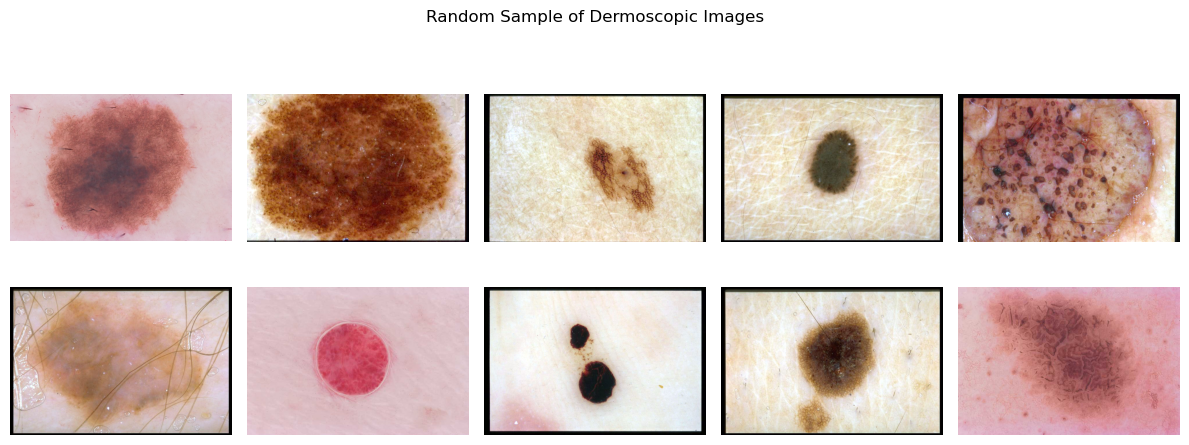

In [20]:
import random
import matplotlib.pyplot as plt

# Sample 10 image_id stems
sample_ids = random.sample(list(df['image_id']), 10)

fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for ax, img_id in zip(axes.flatten(), sample_ids):
    img_path = img_map.get(img_id)
    if img_path and img_path.exists():
        ax.imshow(plt.imread(img_path))
    else:
        ax.text(0.5, 0.5, f"{img_id}\nnot found", ha="center", va="center")
    ax.axis("off")

plt.suptitle("Random Sample of Dermoscopic Images")
plt.tight_layout()
plt.show()


In [16]:
# Count subfolders and total images
subdirs    = [p for p in IMG_ROOT.iterdir() if p.is_dir()]
all_images = list(IMG_ROOT.rglob("*.jpg"))
print(f"{len(subdirs)} subdirs; {len(all_images)} total JPEGs")

# Build image map
img_map = {p.stem: p for p in all_images}
print("Sample img_map entries:", list(img_map.items())[:3])


34 subdirs; 2013 total JPEGs
Sample img_map entries: [('Aal001', WindowsPath('C:/Users/anama/Documents/Group_8/Dataset/DERM7PT/images/A1l/Aal001.jpg')), ('Aal001bis', WindowsPath('C:/Users/anama/Documents/Group_8/Dataset/DERM7PT/images/A1l/Aal001bis.jpg')), ('Aal002', WindowsPath('C:/Users/anama/Documents/Group_8/Dataset/DERM7PT/images/A1l/Aal002.jpg'))]


In [17]:
import random

# Sample 10 IDs from df
sample_ids = random.sample(list(df["image_id"].astype(str)), 10)

fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for ax, img_id in zip(axes.flatten(), sample_ids):
    img_path = img_map.get(img_id)
    if img_path:
        ax.imshow(plt.imread(img_path))
    else:
        ax.text(0.5, 0.5, f"{img_id}\nnot found", ha="center", va="center")
    ax.axis("off")

plt.suptitle("Random Sample of Dermoscopic Images")
plt.tight_layout()
plt.show()


KeyError: 'image_id'